In [8]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def show(img):
    cv2.imshow("test",img)
    cv2.moveWindow("test",40,30)
    cv2.waitKey(0)

In [10]:
def mat_show(image):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # plt.figure(figsize=(12, 6))
    plt.imshow(rgb_image)
    plt.axis('off')  # Turn off axis
    plt.show()

In [11]:
img_path = "D:/cs_4243_captcha_image_mini_project"

In [12]:
training_pth = os.path.join(img_path,"train")
testing_pth = os.path.join(img_path,"test")

In [13]:
sample_pth = "train/00hgi3n7-0.png"
hard_pth = "train/n2ujhk0b-0.png"
test_pth = "train/0jl4-0.png"

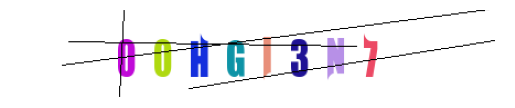

In [14]:
img = cv2.imread(sample_pth)
mat_show(img)

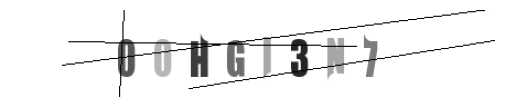

In [15]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
mat_show(gray)

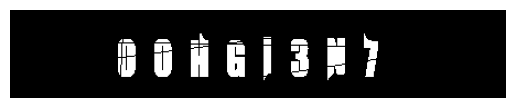

In [16]:
test = np.uint8(np.where((gray!=255) & (gray!=0),255,0))
mat_show(test)

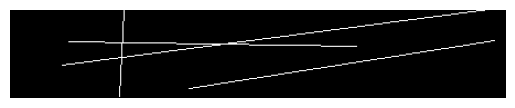

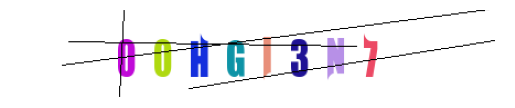

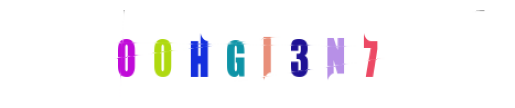

In [17]:
mask = np.uint8(np.where((gray==0),255,0))
mat_show(mask)
mat_show(img)
inpaint = cv2.inpaint(img,mask,inpaintRadius=3,flags=cv2.INPAINT_TELEA)
mat_show(inpaint)

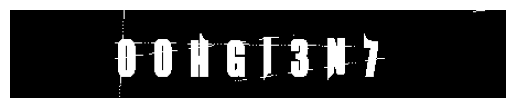

In [18]:
gray = cv2.cvtColor(inpaint,cv2.COLOR_BGR2GRAY)
mask = np.uint8(np.where((gray==255),0,255))
mat_show(mask)

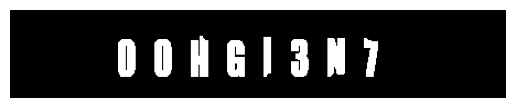

In [19]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel=kernel)
mat_show(opening)

In [20]:
# ret,hierarchy = cv2.findContours(eroded,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# for i in ret:
#     x,y,w,h = cv2.boundingRect(i)
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
# show(img)

In [21]:
output = cv2.connectedComponentsWithStats(opening,8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

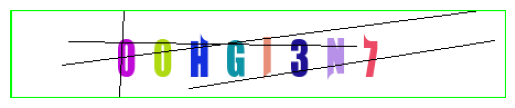

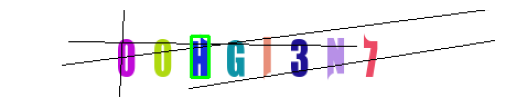

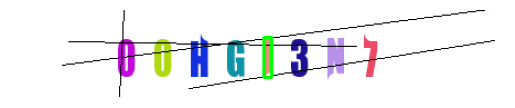

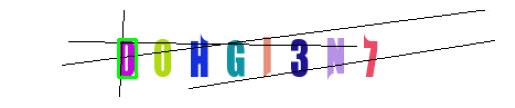

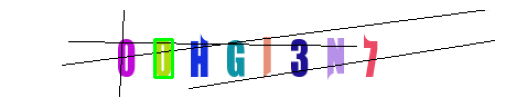

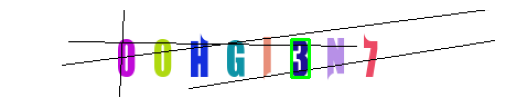

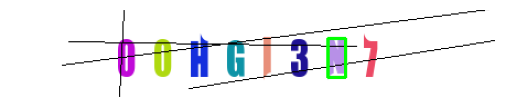

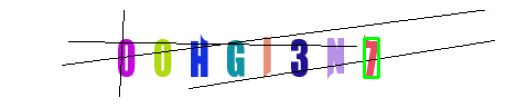

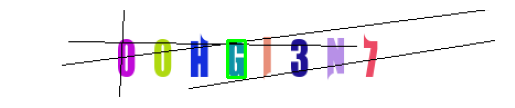

In [22]:
connected_region_area = []
connected_pos=[]
for i in range(0, numLabels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
	if i == 0:
		text = "examining component {}/{} (background)".format(
			i + 1, numLabels)
	# otherwise, we are examining an actual connected component
	else:
		text = "examining component {}/{}".format( i + 1, numLabels)
	# print a status message update for the current connected
	# component
	# print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	output = img.copy()
	connected_region_area.append((w*h))
	connected_pos.append([x,y,w,h])
	test_out = cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)	
	mat_show(test_out)

In [23]:
connected_pos

[[0, 0, 450, 80],
 [164, 24, 16, 37],
 [230, 25, 7, 36],
 [98, 27, 16, 34],
 [131, 27, 16, 34],
 [255, 27, 16, 34],
 [288, 26, 16, 35],
 [321, 26, 13, 35],
 [197, 28, 16, 33]]

In [24]:
connected_region_area

[36000, 592, 252, 544, 544, 544, 560, 455, 528]

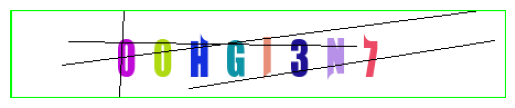

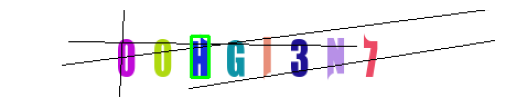

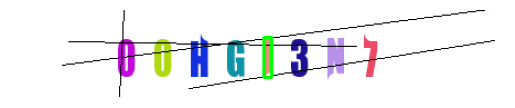

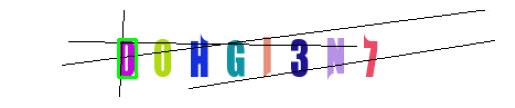

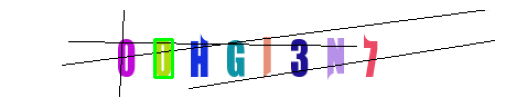

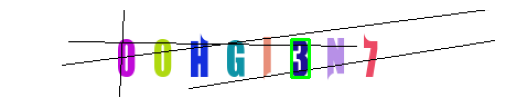

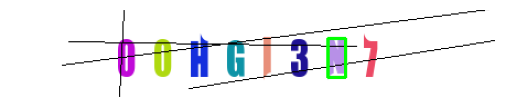

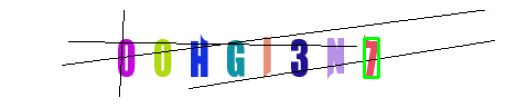

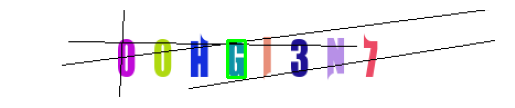

In [25]:
for  x,y,w,h in connected_pos:
    output= img.copy() 
    test_out = cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)	
    mat_show(test_out)

In [26]:
selected_region = []
print(len(connected_region_area))
for i in range(len(connected_region_area)):
    if connected_region_area[i] > 100 and connected_region_area[i] < 600:
        selected_region.append(i)
selected_region

9


[1, 2, 3, 4, 5, 6, 7, 8]

In [27]:
selected_connected_roi  = [connected_pos[i] for i in selected_region]

In [28]:
selected_connected_roi

[[164, 24, 16, 37],
 [230, 25, 7, 36],
 [98, 27, 16, 34],
 [131, 27, 16, 34],
 [255, 27, 16, 34],
 [288, 26, 16, 35],
 [321, 26, 13, 35],
 [197, 28, 16, 33]]

In [29]:
sorted_roi = sorted(selected_connected_roi, key=lambda x: x[0])

In [30]:
sorted_roi

[[98, 27, 16, 34],
 [131, 27, 16, 34],
 [164, 24, 16, 37],
 [197, 28, 16, 33],
 [230, 25, 7, 36],
 [255, 27, 16, 34],
 [288, 26, 16, 35],
 [321, 26, 13, 35]]

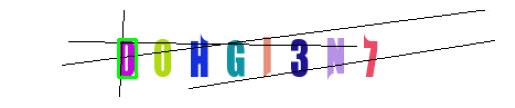

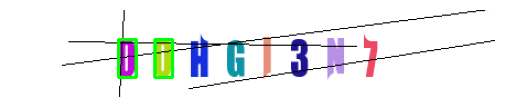

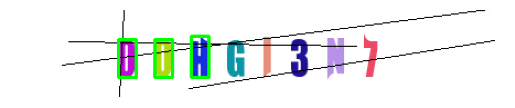

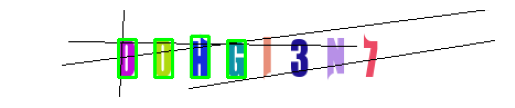

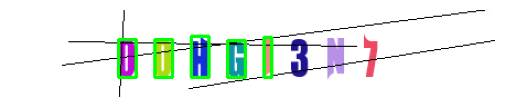

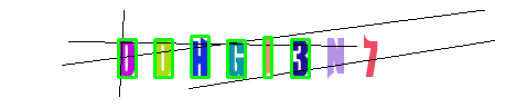

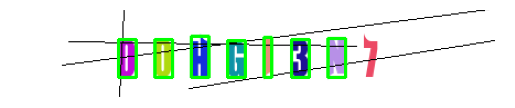

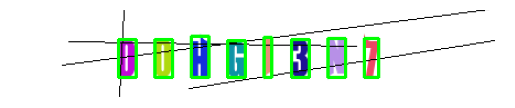

In [31]:
output = img.copy() 
for i in sorted_roi:
    (x,y,w,h) = i
    test_out = cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
    mat_show(test_out)

In [32]:
saved_part = []
pad = 1
for i in sorted_roi:
    (x,y,w,h) = i
    roi = opening[y:y+h,x:x+w]
    roi = cv2.copyMakeBorder(roi,pad,pad,pad,pad,borderType=cv2.BORDER_CONSTANT,value=0)
    saved_part.append(opening[y-pad:y+h+pad,x-pad:x+w+pad])

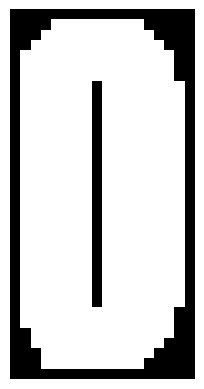

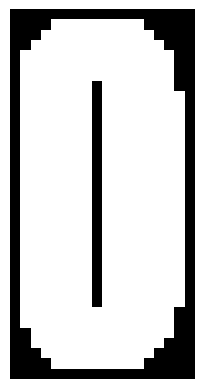

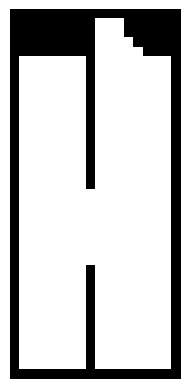

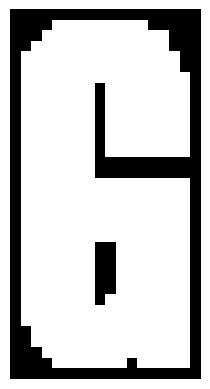

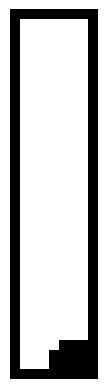

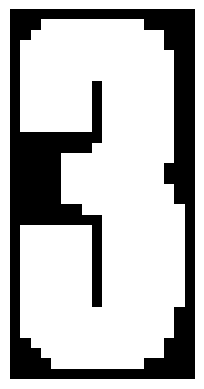

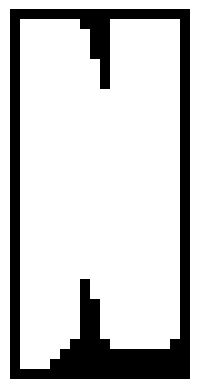

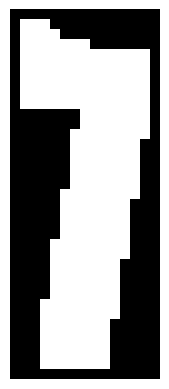

In [33]:
for i in saved_part:
    mat_show(i)